# Simulate an OU process

In [30]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

Simulation Parameters

In [12]:
dt = 0.01             # Integration Time-step
T = 10.0              # Final time (seconds)
N = int(T/dt)              # Total number of data points

Ornstein–Uhlenbeck Variables

In [13]:
mu = 0.0                           # Mean
sigma = 0.001                      # Variance of process
theta = 0.5 * (1/dt)               # Time constant for mean-reversal:value between 0 and 1/dt
sigma = np.sqrt(sigma * 2 * theta) # Stationary long-term variance of OU process

Allocate memory for arrays

In [27]:
x = np.zeros((N,1))
dW = np.random.randn(N,1) * np.sqrt(dt)
t = np.arange(0,T,dt)

In [28]:
for i in range(1,N):
    x[i] = x[i-1] + theta *(mu - x[i-1]) * dt + sigma * dW[i-1]

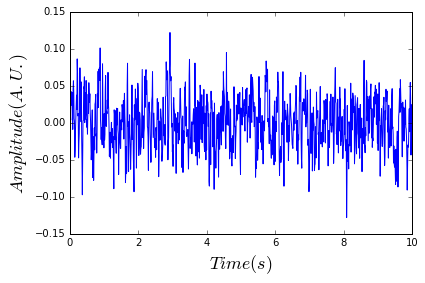

In [33]:
fig, ax = plt.subplots()
ax.plot(t,x, lw=1.0, color="blue", label=r"$x(t)$")
ax.set_xlabel("$Time (s)$", fontsize=18)
ax.set_ylabel("$Amplitude (A.U.)$", fontsize=18)
fig.tight_layout();

fig.savefig("graph.pdf", dpi=300)